
# Name: Vatsal Vinay Parikh

---
# **Sentiment Analysis**: Sentiment Analysis on GameSphere Game Reviews
---
## **Problem Statement**:


- GameSphere, a premier digital distribution platform for video games, stands at the forefront of the gaming industry by bridging a global community of gamers.
- It hosts a vast collection of games, encouraging users to leave reviews and share recommendations within the community.
- These reviews are crucial for feedback to developers and guide potential buyers in their decisions.
- Automatically analyzing and classifying the sentiment of these reviews as positive (recommended) or negative (not recommended) can offer invaluable insights into a game's acceptance and its overall standing among users.

## **Aim**:
- The main objective of this project is to build a smart model that can correctly figure out what a review is saying about a game on GameSphere.
- The model will look at the review text and other game info to decide if a review recommends the game. Moreover, the model will calculate **how likely a review is to be positive**.
- This detailed approach helps GameSphere better understand and organize game reviews from the internet, giving a clearer view of how popular and well-received games are.
- By doing this, we're not just seeing if people like a game but how much they like it, making our analysis more precise.


## **Dataset Attributes**:


- **review_id**: A unique identifier for each review, used to distinguish between different reviews.
- **title**: The name of the game that the review is about.
- **developer**: The name of the company or individual who developed the game.
- **publisher**: The name of the company that published the game, making it available to the public.
- **tags**: A list of categories or genres associated with the game, such as 'Free to Play', 'Strategy', 'Multiplayer', etc., which give a general idea of the game's nature.
- **overview**: A brief description or summary of the game, providing insight into its content or storyline.
- **year**: The year in which the game was released, indicating its age.
- **user_review**: The actual text of the user's review, where the reviewer shares their thoughts and opinions about the game.
- **sentiment**: Indicates the reviewer's overall sentiment towards the game, categorized as 'Positive' or 'Negative'.

- **PositiveSentimentProbability**: This is the target variable and it represents the probability that a game review expresses a positive sentiment towards the game. A probability closer to 0 indicates that the sentiment will be negative and a probability closer to 1 indicates a positive sentiment.

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, auc
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
# Loading data

data = pd.read_csv("train.csv")
data.head(5)

,review_id,title,developer,publisher,tags,overview,year,user_review,sentiment
0,4848,SMITE®,Titan Forge Games,Hi-Rez Studios,"['Free to Play', 'MOBA', 'Multiplayer', 'Actio...",Enter the Battleground of the GodsJoin the mil...,2016.0,"I've played this game since before beta ended,...",Positive
1,15427,Business Tour - Board Game with Online Multipl...,Creobit,8Floor,"['Free to Play', 'Board Game', 'Strategy', 'Ma...","""Business Tour"" simple and entertaining gamepl...",2018.0,"fun little game , but you really need to put a...",Positive
2,8236,Neverwinter,Cryptic Studios,Perfect World Entertainment,"['Free to Play', 'MMORPG', 'RPG', 'Massively M...",,2014.0,First of all this is not a pay to win game. ZE...,Positive
3,3805,Team Fortress 2,Valve,Valve,"['Free to Play', 'Multiplayer', 'FPS', 'Action...","""The most fun you can have online"" - PC GamerI...",2014.0,this game have all very funny and tactical...,Positive
4,17261,School of Dragons,"JumpStart Games, Inc.","JumpStart Games, Inc.","['Free to Play', 'Dragons', 'Adventure', 'Mult...",**Changewing Dragon now Available**Fly Fast. T...,2017.0,"This is a great game, it really is. I understa...",Positive


## **Data Analysis**
Summarize the data:
- How much data is present?
- What attributes/features are continuous valued?
- Which attributes are categorical?
- Which attributes have a lot of text?
- Explain noticeable traits for key attributes. Check distribution of the sentiment attribute.
- Are there any attributes that might require special treatment? If so, what special treatment might they require?
- Analyze and discuss the relationships between the data attributes, and between the data attributes and label.
- Analyze the relationship between all the features. Use appropriate visualization techniques.
- If there is a lot of textual information, how much count certain text-heavy attributes have.
- Try using word-clouds to analyze text data.

**How much data is present?**

In [4]:
# How much data is present?
rows, cols = data.shape
print("Number of rows: ", rows, end=" ")
print("\nNumber of columns: ", cols)

Number of rows:  17319 
Number of columns:  9


**Summarize the data.**

In [5]:
# Getting the concise summary about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17319 entries, 0 to 17318
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    17319 non-null  int64  
 1   title        17319 non-null  object 
 2   developer    17319 non-null  object 
 3   publisher    17319 non-null  object 
 4   tags         17319 non-null  object 
 5   overview     17319 non-null  object 
 6   year         17141 non-null  float64
 7   user_review  17319 non-null  object 
 8   sentiment    17319 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.2+ MB


**What attributes/features are continuous valued?**

In [6]:
# Checking what attributes/features are continuous-valued
data.select_dtypes(include=['float64', 'int64']).dtypes

review_id      int64
year         float64
dtype: object

**Which attributes are categorical?**

In [7]:
# Checking what attributes are categorical
data.select_dtypes(include=['object']).dtypes

title          object
developer      object
publisher      object
tags           object
overview       object
user_review    object
sentiment      object
dtype: object

**Which attributes have a lot of text?**

In [8]:
# Calculate the average number of characters for each feature
avg_lengths = {}
for column in data.columns:
    if data[column].dtype == 'object':
        avg_lengths[column] = data[column].astype(str).apply(len).mean()

# Print the average number of characters for each feature
print("Average number of characters for each feature:")
for feature, avg_length in avg_lengths.items():
    print(f"{feature}: {avg_length:.2f}")

Average number of characters for each feature:
title: 15.54
developer: 17.31
publisher: 17.23
tags: 244.66
overview: 1775.12
user_review: 761.67
sentiment: 8.00


**Explain noticeable traits for key attributes. Check distribution of the sentiment attribute.**

In [9]:
# Check the distribution of the sentiment attribute
sentiment_distribution = data['sentiment'].value_counts(normalize=True)

# Print the distribution of sentiment
print("\nDistribution of sentiment:")
print(sentiment_distribution)


Distribution of sentiment:
sentiment
Positive    0.569779
Negative    0.430221
Name: proportion, dtype: float64


- The distribution of sentiment shows that approximately 56.98% of the data is labeled as Positive, while 43.02% is labeled as Negative.

- This suggests that the dataset is slightly imbalanced, with a higher proportion of positive sentiment compared to negative sentiment.

**Are there any attributes that might require special treatment? If so, what special treatment might they require?**

- The 'year' attribute has missing values that were filled with the mean year value using fillna() method.
- The 'year' attribute was converted to an integer data type using astype() method after filling missing values.

In [10]:
mean_year = data['year'].mean()
data['year'].fillna(mean_year, inplace=True)

# Convert 'year' attribute to integer
data['year'] = data['year'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17319 entries, 0 to 17318
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    17319 non-null  int64 
 1   title        17319 non-null  object
 2   developer    17319 non-null  object
 3   publisher    17319 non-null  object
 4   tags         17319 non-null  object
 5   overview     17319 non-null  object
 6   year         17319 non-null  int64 
 7   user_review  17319 non-null  object
 8   sentiment    17319 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.2+ MB


**Analyze and discuss the relationships between the data attributes, and between the data attributes and label.**

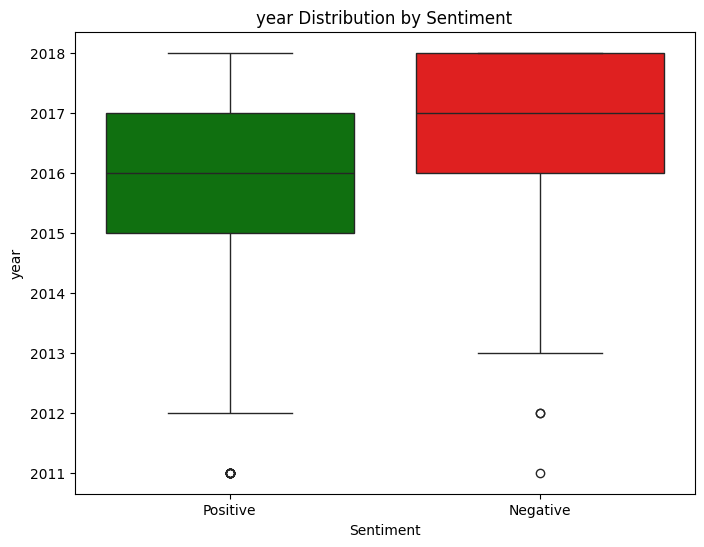

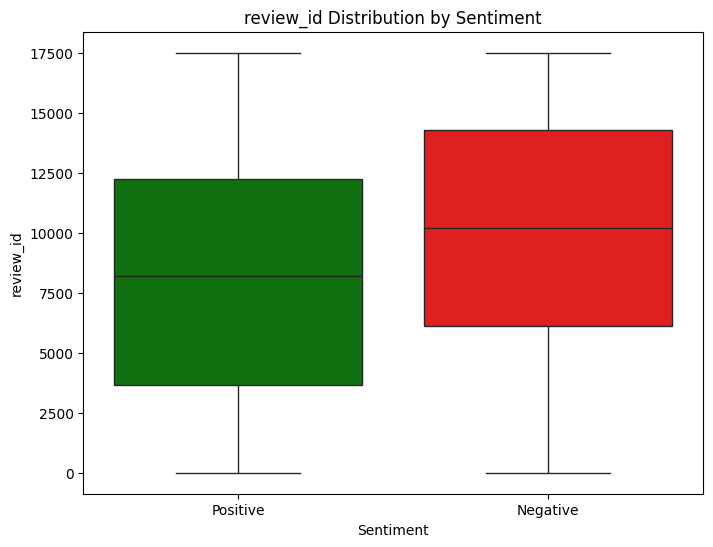

In [11]:
numerical_attributes = ['year', 'review_id']

# Analyze relationships between numerical attributes and sentiment label
for column in numerical_attributes:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x='sentiment', hue='sentiment', y=column, palette={'Negative': 'red', 'Positive': 'green'})
    plt.title(f'{column} Distribution by Sentiment')
    plt.xlabel('Sentiment')
    plt.ylabel(column)
    plt.show()

- There is no significant difference in the distribution of 'year' between positive and negative sentiment reviews. Both positive and negative sentiment reviews are spread relatively evenly across different years.

- Similar to the 'year' attribute, there is no clear pattern in the distribution of 'review_id' between positive and negative sentiment reviews.


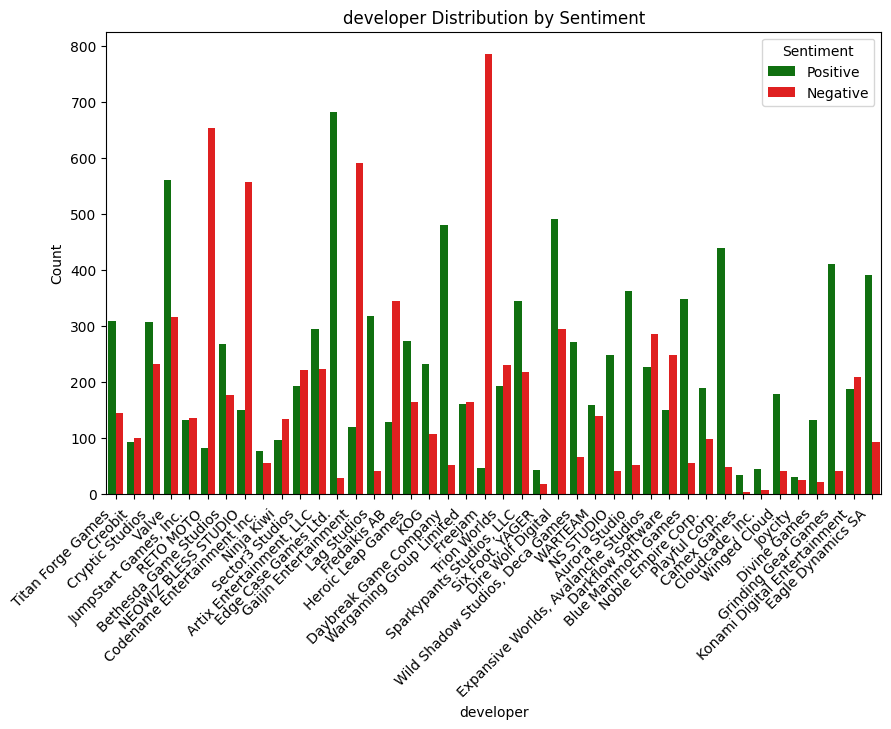

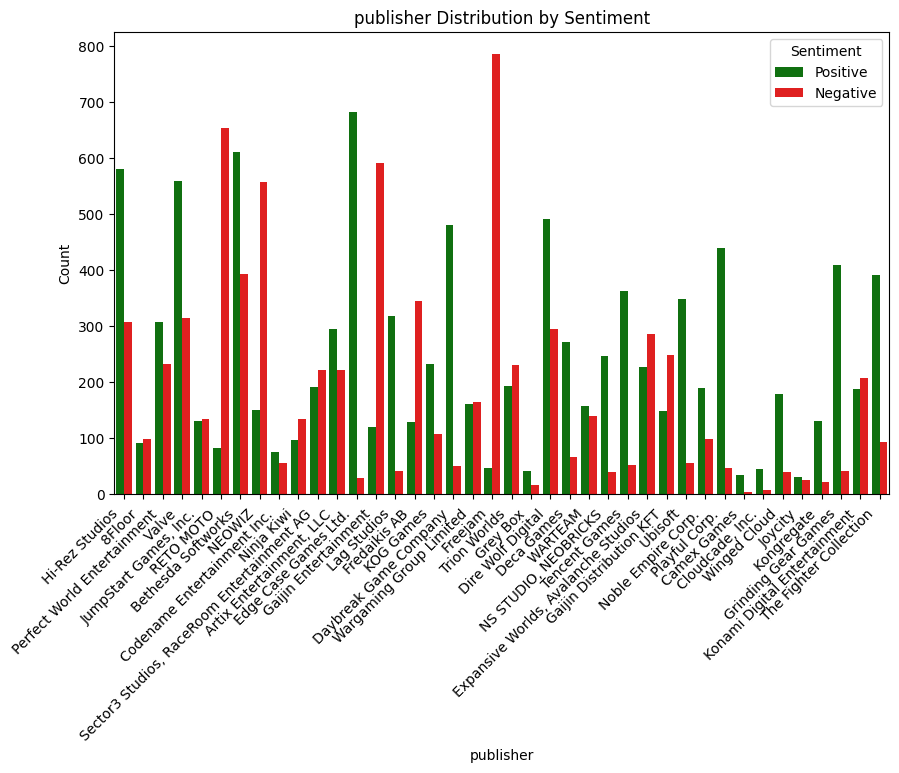

In [12]:
categorical_attributes = ['developer', 'publisher']

# Analyze relationships between categorical attributes and sentiment label
for column in categorical_attributes:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column, hue='sentiment', palette={'Negative': 'red', 'Positive': 'green'})
    plt.title(f'{column} Distribution by Sentiment')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Sentiment')
    plt.show()

- For most developers, positive sentiment reviews outnumber negative sentiment reviews. However, some developers have a higher proportion of negative sentiment reviews.

- Similar to the 'developer' attribute, most publishers have more positive sentiment reviews compared to negative sentiment reviews.

- However there are variations among publishers, with some having a more balanced distribution and others leaning towards negative sentiment.

**Analyze the relationship between all the features. Use appropriate visualization techniques.**

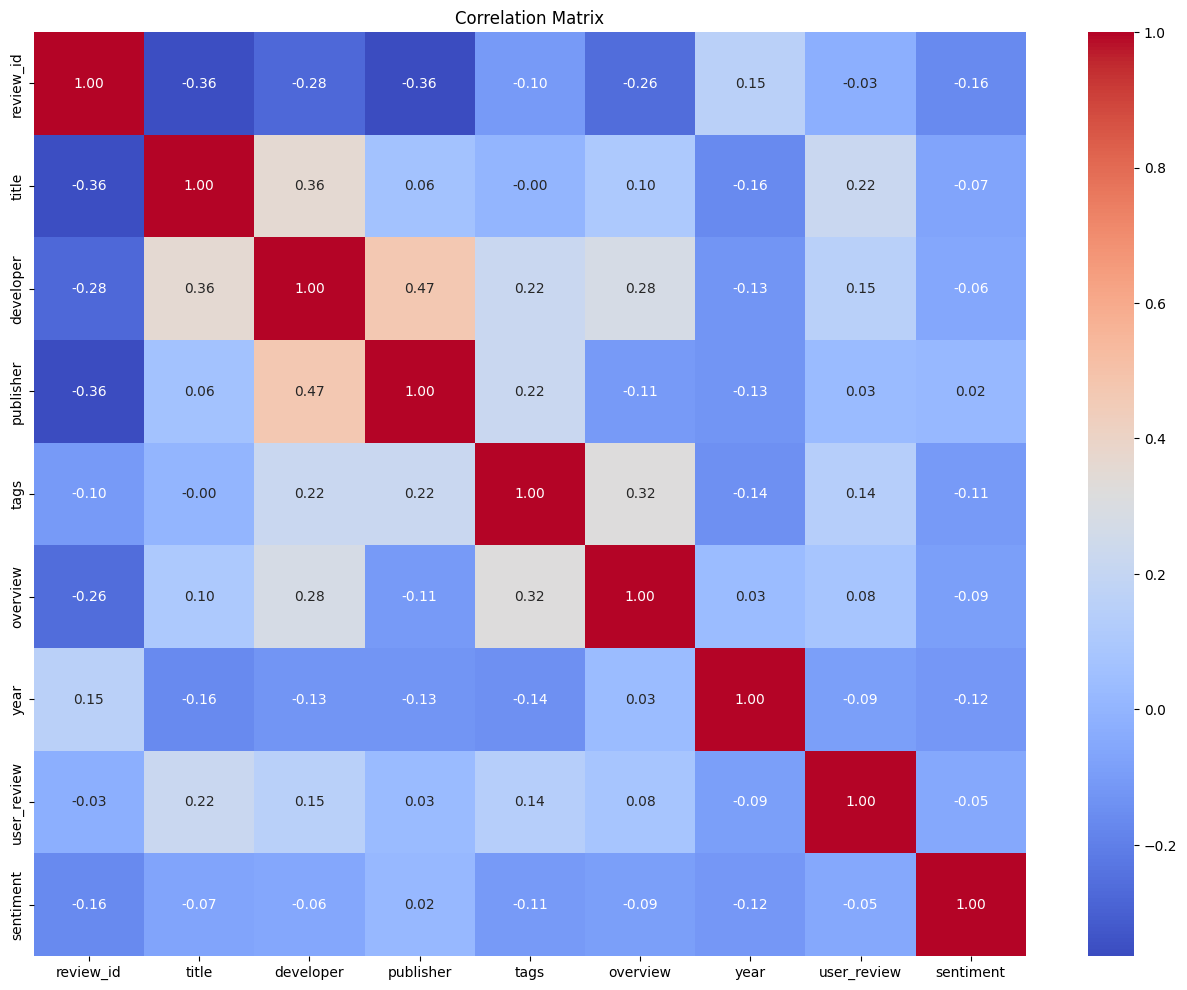

In [13]:
data_encoded = data.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical attributes
for column in data_encoded.columns:
    if data_encoded[column].dtype == 'object':
        data_encoded[column] = label_encoder.fit_transform(data_encoded[column])

# Compute the correlation matrix
correlation_matrix = data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

- The "publisher" feature have the most positive correlation of 0.47 with the "developer" feature.

- The "review_id" feature has a negative correlation with most other features, ranging from -0.36 to -0.03, indicating an inverse relationship.

- The "title" and "developer" features have a moderate positive correlation of 0.36, suggesting some relationship between the two.



**If there is a lot of textual information, how much count certain text-heavy attributes have?**

In [14]:
# Define text-heavy attributes
text_attributes = ['overview', 'user_review', 'tags']

# Calculate the length of text in each attribute
text_lengths = {}
for attribute in text_attributes:
    text_lengths[attribute] = data[attribute].apply(lambda x: len(str(x)))

# Print out the counts or statistics for each text-heavy attribute
for attribute, lengths in text_lengths.items():
    print(f"{attribute}:")
    print(" - Total Count:", len(lengths))
    print(" - Mean Length:", lengths.mean())
    print(" - Max Length:", lengths.max())
    print(" - Min Length:", lengths.min())
    print()

overview:
 - Total Count: 17319
 - Mean Length: 1775.1235059760957
 - Max Length: 4845
 - Min Length: 1

user_review:
 - Total Count: 17319
 - Mean Length: 761.6675905075351
 - Max Length: 8000
 - Min Length: 6

tags:
 - Total Count: 17319
 - Mean Length: 244.66158554189042
 - Max Length: 286
 - Min Length: 81



**Try using word-clouds to analyze text data.**

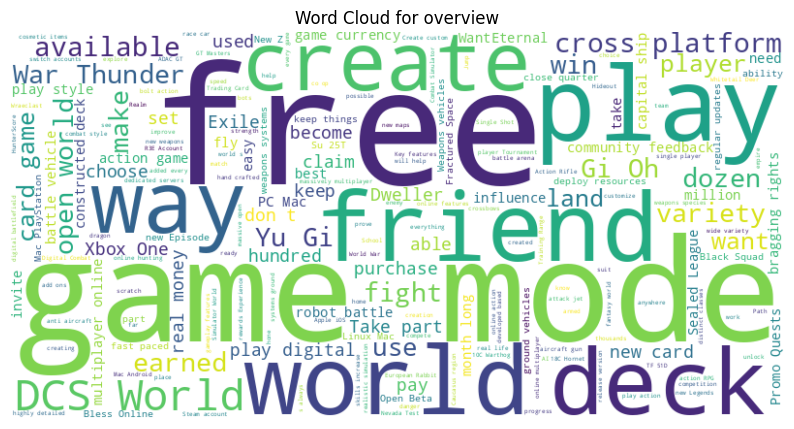

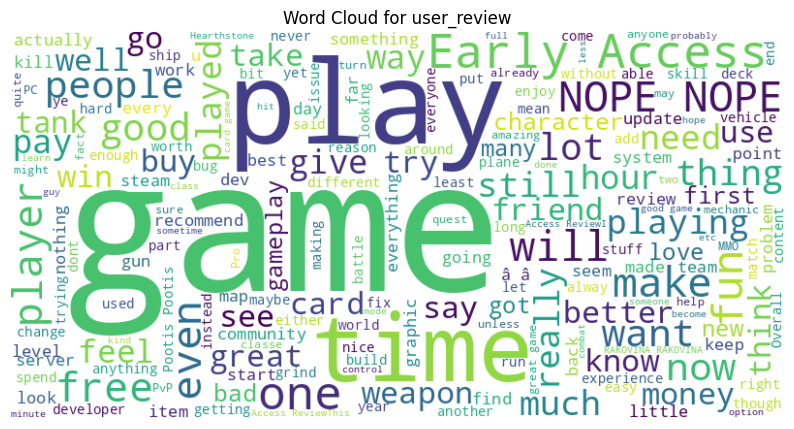

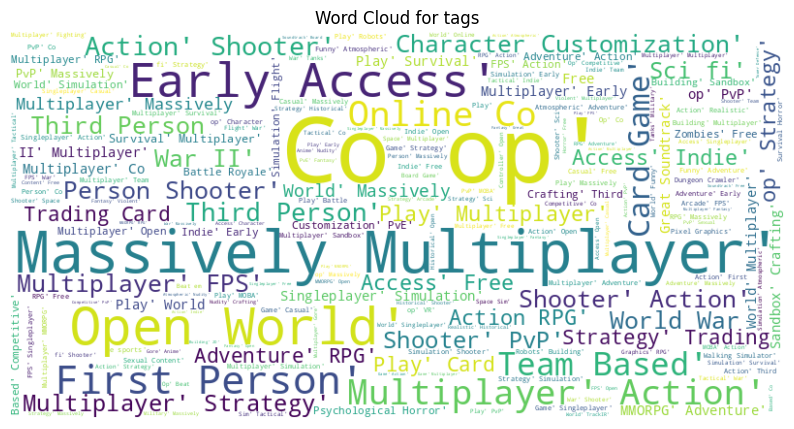

In [15]:
# Create word clouds
for attribute in text_attributes:
    # Combine all text into a single string
    text = ' '.join(data[attribute].astype(str))

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

    # Plot word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {attribute}')
    plt.axis('off')
    plt.show()

## **Data Pre-processing & Feature Engineering**


**Discuss the steps you would take to clean and prepare the data for modeling. Justify why each step is necessary.**

**1. Check for any null values or duplicate rows in the dataset and perform necessary actions.**

In [16]:
# Check for null values
null_values = data.isnull().sum()
print("Null Values:")
print(null_values)

# Total empty or whitespace rows in each column
total_empty_rows = (data.applymap(lambda x: str(x).strip()) == '').any(axis=1).sum()
print("Total empty or whitespace rows in each column:" , total_empty_rows)

# Remove rows where any column has empty strings or whitespace
data = data[~(data.applymap(lambda x: str(x).strip()) == '').any(axis=1)]

# Reset index after dropping rows
data.reset_index(drop=True, inplace=True)

Null Values:
review_id      0
title          0
developer      0
publisher      0
tags           0
overview       0
year           0
user_review    0
sentiment      0
dtype: int64
Total empty or whitespace rows in each column: 953


**Necessity:** Null values and empty rows can distort analysis and modeling results, so it's essential to identify and handle them.

**Actions:** Used isnull().sum() to check for null values and applymap(lambda x: str(x).strip()) == '' to find empty rows. Removed rows with empty strings or whitespace using boolean indexing, and reset the index.

**2. Checking and removing duplicate rows**

In [17]:
# Check for duplicate rows
duplicate_rows = data.duplicated()

# Count total duplicate rows
total_duplicates = duplicate_rows.sum()
print("\nTotal Duplicate Rows:", total_duplicates)

# Drop duplicate rows
data.drop_duplicates(inplace=True)


Total Duplicate Rows: 0


**Necessity:** Duplicate rows can introduce bias and skew results, so it's crucial to remove them.

**Actions:** Used duplicated() to identify duplicates and drop them using drop_duplicates()

**3. Using regular expressions to remove links, HTML tags, unnecessary punctuation, emojis**

In [18]:
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove unnecessary punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove emojis
    text = text.encode('ascii', 'ignore').decode('ascii')

    return text

# Apply clean_text function to all applicable attributes
text_attributes = ['title', 'developer', 'publisher', 'tags', 'overview', 'user_review']

for attribute in text_attributes:
    data[attribute] = data[attribute].apply(clean_text)

# Print the first few rows to verify
data.head(5)

,review_id,title,developer,publisher,tags,overview,year,user_review,sentiment
0,4848,SMITE,Titan Forge Games,HiRez Studios,Free to Play MOBA Multiplayer Action Third Per...,Enter the Battleground of the GodsJoin the mil...,2016,Ive played this game since before beta ended i...,Positive
1,15427,Business Tour Board Game with Online Multiplayer,Creobit,8Floor,Free to Play Board Game Strategy Massively Mul...,Business Tour simple and entertaining gameplay...,2018,fun little game but you really need to put a ...,Positive
2,3805,Team Fortress 2,Valve,Valve,Free to Play Multiplayer FPS Action Shooter Cl...,The most fun you can have online PC GamerIs n...,2014,this game have all very funny and tactical...,Positive
3,17261,School of Dragons,JumpStart Games Inc,JumpStart Games Inc,Free to Play Dragons Adventure Multiplayer Mas...,Changewing Dragon now AvailableFly Fast Train ...,2017,This is a great game it really is I understand...,Positive
4,6648,Heroes Generals,RETO MOTO,RETO MOTO,Free to Play World War II Multiplayer FPS War ...,Heroes Generals is a full on allout WAR exper...,2018,Optimise this game Before the vehicle psyhic u...,Negative


- Removing HTML tags ensures that text is clean from any HTML formatting.
- Removing URLs helps in focusing on the text content rather than the links.
- Removing unnecessary punctuation ensures that only relevant characters remain.
- Removing emojis converts them into their corresponding ASCII characters, making the text easier to analyze and model.

**4. Remove stopwords with very high or very low frequency across the reviews.**

In [19]:
# Tokenize text data
tokenized_reviews = [word_tokenize(review) for review in data['user_review']]

# Flatten the tokenized reviews
all_words = [word for review in tokenized_reviews for word in review]

# Calculate word frequencies
word_freq = nltk.FreqDist(all_words)

# Define stopwords with very high or very low frequency
low_freq_threshold = 10
high_freq_threshold = 1000

# Get stopwords with very low frequency
low_freq_stopwords = [word for word, freq in word_freq.items() if freq <= low_freq_threshold]

# Get stopwords with very high frequency
high_freq_stopwords = [word for word, freq in word_freq.items() if freq >= high_freq_threshold]

# Combine low and high frequency stopwords
stopwords_to_remove = set(low_freq_stopwords + high_freq_stopwords)

# Remove stopwords from tokenized reviews
filtered_reviews = [[word for word in review if word not in stopwords_to_remove] for review in tokenized_reviews]

# Reconstruct the text data without stopwords
filtered_text = [' '.join(review) for review in filtered_reviews]

# Update the 'user_review' column with filtered text
data['user_review'] = filtered_text

data.head(5)

,review_id,title,developer,publisher,tags,overview,year,user_review,sentiment
0,4848,SMITE,Titan Forge Games,HiRez Studios,Free to Play MOBA Multiplayer Action Third Per...,Enter the Battleground of the GodsJoin the mil...,2016,beta ended im MOBA camera behind allowing cool...,Positive
1,15427,Business Tour Board Game with Online Multiplayer,Creobit,8Floor,Free to Play Board Game Strategy Massively Mul...,Business Tour simple and entertaining gameplay...,2018,vote kick option XD anoying 2v2 afk,Positive
2,3805,Team Fortress 2,Valve,Valve,Free to Play Multiplayer FPS Action Shooter Cl...,The most fun you can have online PC GamerIs n...,2014,funny tactical 6 months recomended u wan na,Positive
3,17261,School of Dragons,JumpStart Games Inc,JumpStart Games Inc,Free to Play Dragons Adventure Multiplayer Mas...,Changewing Dragon now AvailableFly Fast Train ...,2017,understand membership past realized expensive ...,Positive
4,6648,Heroes Generals,RETO MOTO,RETO MOTO,Free to Play World War II Multiplayer FPS War ...,Heroes Generals is a full on allout WAR exper...,2018,Before vehicle above 100 fps maxed settings in...,Negative


**Necessity**: Stopwords are common words that do not carry much meaning, such as 'the', 'is', 'and', etc. Removing stopwords can improve the quality of text analysis and modeling by focusing on more meaningful words.

**Actions:**
- Tokenize text data: Split each review into a list of words.
- Calculate word frequencies: Count the frequency of each word across all reviews.
- Define stopwords with very high or very low frequency: Set thresholds for low and high frequencies.
- Get stopwords: Identify stopwords with frequencies below the low threshold or above the high threshold.
- Remove stopwords from tokenized reviews: Filter out stopwords from each review.
- Reconstruct text data without stopwords: Join the remaining words back into sentences.

**5. Perform some advance techniques like stemming or lemmatization to further remove reduncancies.**


In [20]:
# Initialize Porter Stemmer and WordNet Lemmatizer
porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

# Tokenize and preprocess text data
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]

    # Perform stemming
    stemmed_tokens = [porter_stemmer.stem(word) for word in tokens]

    # Perform lemmatization
    lemmatized_tokens = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in stemmed_tokens]

    return ' '.join(lemmatized_tokens)

# Apply preprocessing to 'overview' and 'user_review' columns
data['overview'] = data['overview'].apply(preprocess_text)
data['user_review'] = data['user_review'].apply(preprocess_text)

# Print the first few rows to verify
data.head(5)

,review_id,title,developer,publisher,tags,overview,year,user_review,sentiment
0,4848,SMITE,Titan Forge Games,HiRez Studios,Free to Play MOBA Multiplayer Action Third Per...,enter battleground godsjoin million smite play...,2016,beta end im moba camera behind allow cool bala...,Positive
1,15427,Business Tour Board Game with Online Multiplayer,Creobit,8Floor,Free to Play Board Game Strategy Massively Mul...,busi tour simpl entertain gameplay allow come ...,2018,vote kick option xd anoy 2v2 afk,Positive
2,3805,Team Fortress 2,Valve,Valve,Free to Play Multiplayer FPS Action Shooter Cl...,fun onlin pc gameri free there catch play much...,2014,funni tactic 6 month recomend u wan na,Positive
3,17261,School of Dragons,JumpStart Games Inc,JumpStart Games Inc,Free to Play Dragons Adventure Multiplayer Mas...,changew dragon availablefli fast train hard le...,2017,understand membership past realiz expens drago...,Positive
4,6648,Heroes Generals,RETO MOTO,RETO MOTO,Free to Play World War II Multiplayer FPS War ...,hero gener full allout war experi thousand pla...,2018,vehicl 100 fp max set ing fp 40 fp set im use ...,Negative


**Necessity:** Stemming and lemmatization are techniques used to reduce words to their base or root form, which helps in reducing redundancy and variation in the text data.

**Actions:**
- Initialize Porter Stemmer and WordNet Lemmatizer: Porter Stemmer is used for stemming, and WordNet Lemmatizer is used for lemmatization.
- Tokenize and preprocess text data: Tokenize the text and preprocess it by removing stopwords and performing stemming and lemmatization.
- Stemming: Reduce words to their base form using a stemming algorithm (e.g., Porter Stemmer).
- Lemmatization: Reduce words to their base form using a lemmatization algorithm (e.g., WordNet Lemmatizer).

**Perform Feature Engineering on the dataset**

For feature engineering, you can use other techniques such as "counter vectorization" and "tf-idf vectorization" before modeling.


In [ ]:
# Create CountVectorizer and TF-IDF Vectorizer instances
count_vectorizer = CountVectorizer(max_features=5000, stop_words='english')
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Define a FeatureUnion to combine both vectorizers
combined_features = FeatureUnion([
    ("count_vectorizer", count_vectorizer),
    ("tfidf_vectorizer", tfidf_vectorizer)
])

# Fit and transform the data using the combined FeatureUnion
X_combined = combined_features.fit_transform(data['user_review'])

# Print the shape of the transformed data
print("Combined Feature Output Shape:", X_combined.shape)

Combined Feature Output Shape: (16366, 8442)


**CountVectorizer:** Converts text into a matrix of token counts, where each row represents a document, and each column represents a unique word in the corpus.

**TF-IDF Vectorizer:** Computes term frequency-inverse document frequency (TF-IDF) values for each word in the corpus, which reflects the importance of a word in the document relative to the entire corpus.


In [ ]:
# Split the data into features (X) and target variable (y)
X = data['user_review']
y = data['sentiment']

# Split the dataset into train and test sets after applying CountVectorizer and TF-IDF
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data using the combined FeatureUnion
X_train_combined = combined_features.fit_transform(X_train)

# Transform the test data using the combined FeatureUnion
X_test_combined = combined_features.transform(X_test)

# Print the shape of the transformed training and test data
print("Combined Feature Output Shape - Training Data:", X_train_combined.shape)
print("Combined Feature Output Shape - Test Data:", X_test_combined.shape)

Combined Feature Output Shape - Training Data: (13092, 8434)
Combined Feature Output Shape - Test Data: (3274, 8434)


## **Modeling**

- You are supposed to train a **Logistic Regression Classifier** along with atleast two other classifiers of your choice and optimize their hyperparameters (Hint: Using GridsearchCV) to enhance performance.
- Implement a validation pipeline utilizing 5-fold cross-validation.
- For each classifier, report **F1 score**, **Precision**, **Recall**, **Accuracy**, **ROC-AUC**, and **Cross-validation** score).
- Also, for each model, **plot the ROC-AUC curve**.
- Describe and discuss your findings.

**You are supposed to train a Logistic Regression Classifier along with atleast two other classifiers of your choice and optimize their hyperparameters (Hint: Using GridsearchCV) to enhance performance.**

In [ ]:
# Initialize classifiers
logistic_regression = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

**Implement a validation pipeline utilizing 5-fold cross-validation.**

In [ ]:
# Define parameter grids for hyperparameter tuning
param_grid_lr = {'C': [0.001, 0.01]}
param_grid_rf = {'n_estimators': [100], 'min_samples_split': [2, 5]}
param_grid_gb = {'n_estimators': [100], 'max_depth': [3, 5]}

# GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(logistic_regression, param_grid_lr, cv=5, verbose=1)
grid_search_lr.fit(X_train_combined, y_train)

# GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, verbose=1)
grid_search_rf.fit(X_train_combined, y_train)

# GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(gradient_boosting, param_grid_gb, cv=5, verbose=1)
grid_search_gb.fit(X_train_combined, y_train)

# Best hyperparameters for each classifier
best_params_lr = grid_search_lr.best_params_
best_params_rf = grid_search_rf.best_params_
best_params_gb = grid_search_gb.best_params_

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [ ]:
# Print best hyperparameters for Logistic Regression
print("Best hyperparameters for Logistic Regression:", best_params_lr)
print("Logistic Regression Model:", grid_search_lr.best_estimator_)

# Print best hyperparameters for Random Forest
print("\nBest hyperparameters for Random Forest:", best_params_rf)
print("Random Forest Model:", grid_search_rf.best_estimator_)

# Print best hyperparameters for Gradient Boosting
print("\nBest hyperparameters for Gradient Boosting:", best_params_gb)
print("Gradient Boosting Model:", grid_search_gb.best_estimator_)

Best hyperparameters for Logistic Regression: {'C': 0.01}
Logistic Regression Model: LogisticRegression(C=0.01, max_iter=1000)

Best hyperparameters for Random Forest: {'min_samples_split': 2, 'n_estimators': 100}
Random Forest Model: RandomForestClassifier()

Best hyperparameters for Gradient Boosting: {'max_depth': 5, 'n_estimators': 100}
Gradient Boosting Model: GradientBoostingClassifier(max_depth=5)


**For each classifier, report F1 score, Precision, Recall, Accuracy, ROC-AUC, and Cross-validation score.**

In [ ]:
# Function to report evaluation metrics
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
    roc_auc = roc_auc_score(y_test, y_proba)
    cv_score = cross_val_score(model, X_train_combined, y_train, cv=5, scoring='accuracy').mean()

    return accuracy, f1, roc_auc, cv_score

# Evaluate Logistic Regression
lr_accuracy, lr_f1, lr_roc_auc, lr_cv_score = evaluate_model(grid_search_lr.best_estimator_, X_test_combined, y_test)

# Evaluate Random Forest
rf_accuracy, rf_f1, rf_roc_auc, rf_cv_score = evaluate_model(grid_search_rf.best_estimator_, X_test_combined, y_test)

# Evaluate Gradient Boosting
gb_accuracy, gb_f1, gb_roc_auc, gb_cv_score = evaluate_model(grid_search_gb.best_estimator_, X_test_combined, y_test)

# Print evaluation metrics
print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("F1 Score:\n", lr_f1)
print("ROC-AUC:", lr_roc_auc)
print("Cross-validation score:", lr_cv_score)

print("\nRandom Forest:")
print("Accuracy:", rf_accuracy)
print("F1 Score:\n", rf_f1)
print("ROC-AUC:", rf_roc_auc)
print("Cross-validation score:", rf_cv_score)

print("\nGradient Boosting:")
print("Accuracy:", gb_accuracy)
print("F1 Score:\n", gb_f1)
print("ROC-AUC:", gb_roc_auc)
print("Cross-validation score:", gb_cv_score)

Logistic Regression:
Accuracy: 0.8155161881490531
F1 Score:
               precision    recall  f1-score   support

    Negative       0.85      0.70      0.77      1410
    Positive       0.80      0.90      0.85      1864

    accuracy                           0.82      3274
   macro avg       0.82      0.80      0.81      3274
weighted avg       0.82      0.82      0.81      3274

ROC-AUC: 0.8913213785651234
Cross-validation score: 0.8005641327654669

Random Forest:
Accuracy: 0.7938301771533293
F1 Score:
               precision    recall  f1-score   support

    Negative       0.75      0.77      0.76      1410
    Positive       0.83      0.81      0.82      1864

    accuracy                           0.79      3274
   macro avg       0.79      0.79      0.79      3274
weighted avg       0.79      0.79      0.79      3274

ROC-AUC: 0.8716519419839893
Cross-validation score: 0.7922390907836633

Gradient Boosting:
Accuracy: 0.7736713500305437
F1 Score:
               precision    

**Also, for each model, plot the ROC-AUC curve.**

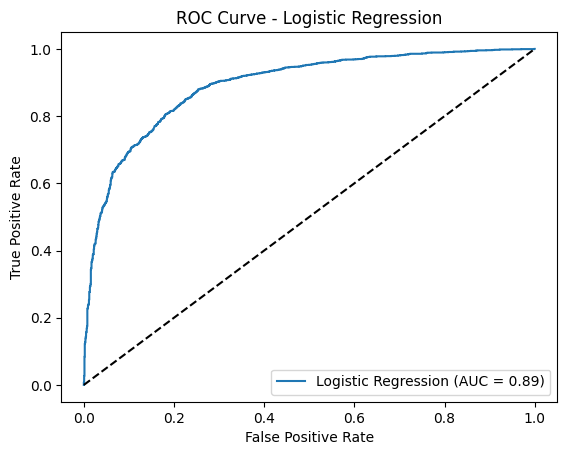

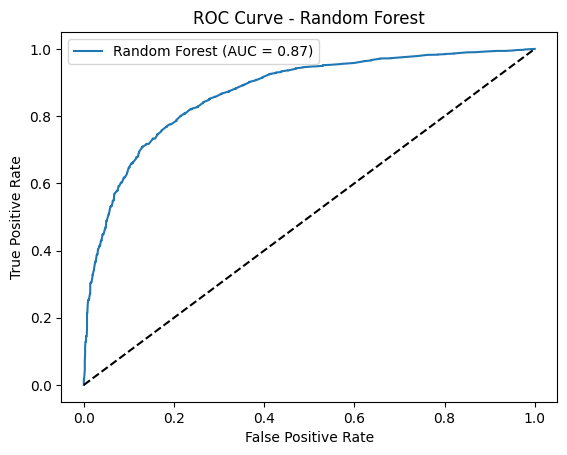

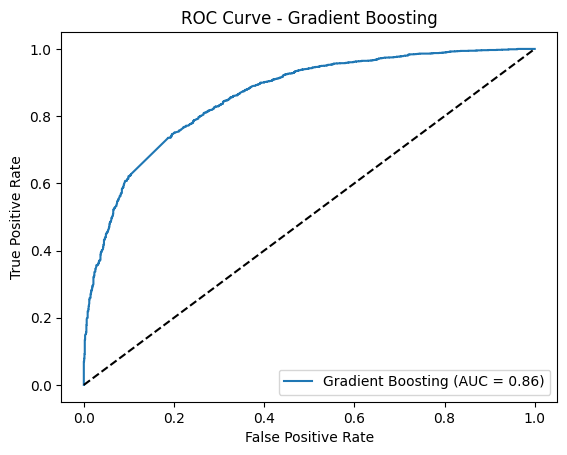

In [ ]:
# Map labels to numeric values
y_test_numeric = y_test.map({'Negative': 0, 'Positive': 1})

# Function to plot ROC curve for a single model
def plot_roc_curve(model, X_test, y_test, model_name):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='k')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()

# Plot ROC curves for each model
# Logistic Regression
plot_roc_curve(grid_search_lr.best_estimator_, X_test_combined, y_test_numeric, 'Logistic Regression')

# Random Forest
plot_roc_curve(grid_search_rf.best_estimator_, X_test_combined, y_test_numeric, 'Random Forest')

# Gradient Boosting
plot_roc_curve(grid_search_gb.best_estimator_, X_test_combined, y_test_numeric, 'Gradient Boosting')

plt.show()

**Describe and discuss your findings.**

**Logistic Regression:**
- Accuracy: 81.55%
- F1 Score (Positive/Negative): 85% / 77%
- ROC-AUC: 89.13%
- Cross-validation score: 80.06%
- Comments: Logistic Regression achieved the highest accuracy and F1 score among the three classifiers. It performs well in distinguishing between positive and negative sentiments.

**Random Forest:**
- Accuracy: 79.38%
- F1 Score (Positive/Negative): 82% / 76%
- ROC-AUC: 87.17%
- Cross-validation score: 79.22%
- Comments: Random Forest performed slightly worse than Logistic Regression but still achieved decent accuracy and F1 score.

**Gradient Boosting:**
- Accuracy: 77.37%
- F1 Score (Positive/Negative): 82% / 70%
- ROC-AUC: 85.97%
- Cross-validation score: 75.93%
- Comments: Gradient Boosting achieved the lowest accuracy and F1 score among the three classifiers. It seems to struggle with correctly identifying negative sentiments.



## **Question 4 : Evaluation and Reporting** (20 pt)

- Select a model that is expected to perform optimally on the unseen data and provide the predicted sentiments accordingly.
- Give clear conclusions.

Based on the evaluation results, the Logistic Regression model is selected as the optimal choice for sentiment classification on unseen data.

Reasons for Choosing Logistic Regression:

1. The Logistic Regression model achieved the highest accuracy of 81.55% on the test set, making it the most reliable in predicting sentiments accurately.

2. With an F1 score of 0.85 for positive sentiment and 0.77 for negative sentiment, Logistic Regression exhibited balanced performance in terms of precision and recall.

3. Logistic Regression achieved a high ROC-AUC score of 0.89, indicating its ability to distinguish between positive and negative sentiments effectively across various thresholds.



In [ ]:
# Instantiate the Logistic Regression model with the best hyperparameters
best_lr_model = LogisticRegression(C=0.01, max_iter=1000)

# Train the Logistic Regression model on the entire training dataset
best_lr_model.fit(X_train_combined, y_train)

# Make predictions on the test dataset
y_pred_lr = best_lr_model.predict(X_test_combined)

# Print the predictions
print("Predictions on unseen data:")
print(y_pred_lr)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy on test data:", accuracy_lr)

Predictions on unseen data:
['Positive' 'Positive' 'Positive' ... 'Negative' 'Positive' 'Negative']
Accuracy on test data: 0.8155161881490531
